In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [30]:
crime_data = pd.read_csv('../new_data/zip_crime_data.csv')

In [31]:
def splitToTrainTest(dataframe, trainPercent):
    recordNum = dataframe.shape[0]
    shuffledIndex = np.random.permutation(np.arange(recordNum))
    trainSetNum = int(recordNum * trainPercent)
    trainDf, testDf = dataframe.iloc[shuffledIndex[:trainSetNum]], dataframe.iloc[shuffledIndex[trainSetNum:]]
    return trainDf, testDf
train_df, test_df = splitToTrainTest(crime_data, 0.8)

In [26]:
# ['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION']
clf = DecisionTreeClassifier(criterion='entropy')
irrelevant_labels = ['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION', 'zipcode', 'time', 'date']
y_labels = ['LEVEL_FELONY']#,'LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION']
clf.fit(train_df.drop(irrelevant_labels, axis='columns'), train_df[y_labels])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0,0.5,'Normalized Gini Importance')

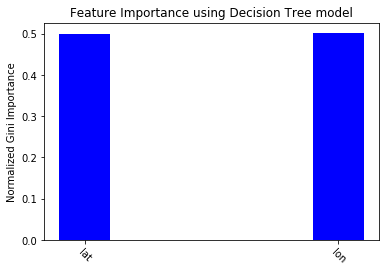

In [27]:
new_df = pd.DataFrame({'importance':clf.feature_importances_, 'feature':train_df.drop(irrelevant_labels, 1).columns.values})
new_df.sort_values('importance', axis = 0, inplace = True)
fig, ax = plt.subplots()
ax.bar(np.arange(len(new_df['importance'].values)), new_df['importance'].values, width = 0.2, color='b')
ax.set_xticks(np.arange(len(new_df['importance'].values)))
ax.set_xticklabels(new_df['feature'].values, rotation=-45)
plt.title('Feature Importance using Decision Tree model')
ax.set_ylabel('Normalized Gini Importance')

In [23]:
train_df[['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION', 'lat', 'lon']].corr()

,LEVEL_FELONY,LEVEL_MISDEMEANOR,LEVEL_VIOLATION,lat,lon
LEVEL_FELONY,1.000000,-0.730940,-0.270764,-0.015792,0.029261
LEVEL_MISDEMEANOR,-0.730940,1.000000,-0.459038,0.028364,-0.029420
LEVEL_VIOLATION,-0.270764,-0.459038,1.000000,-0.019451,0.003407
lat,-0.015792,0.028364,-0.019451,1.000000,0.315246
lon,0.029261,-0.029420,0.003407,0.315246,1.000000


In [28]:
train_predict = clf.predict(train_df.drop(irrelevant_labels, axis=1))
test_predict = clf.predict(test_df.drop(irrelevant_labels, axis=1))
train_accuracy = metrics.accuracy_score(train_predict, train_df[y_labels])
test_accuracy = metrics.accuracy_score(test_predict, test_df[y_labels])

print('Train accuracy = {}\nTest accuracy = {}'.format(train_accuracy, test_accuracy))

Train accuracy = 0.527714854351366
Test accuracy = 0.3967693376563224
